In [1]:
# Python
import tensorflow as tf
hello = tf.constant('Hello, TensorFlow!')
sess = tf.Session()
print(sess.run(hello))


b'Hello, TensorFlow!'


In [ ]:
#####################################
####### IMPORT AND CLEAN DATA #######
#####################################

In [2]:
# Import Pandas for data manipulation using dataframes
import pandas as pd
#Import Numpy for statistical calculations
import numpy as np
# Import Warnings 
import warnings
warnings.filterwarnings('ignore')
# Import matplotlib Library for data visualisation
import matplotlib.pyplot as plt
#Import train_test_split from scikit library
from sklearn.model_selection import train_test_split
# Import Keras
import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten,Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

Using TensorFlow backend.


In [3]:
import pandas as pd

# Create dataframes for train and test datasets
train_df = pd.read_csv('/Users/coreylucero/Desktop/Syracuse/IST718/Lab 9/fashion-mnist_train.csv',sep=',')
test_df = pd.read_csv('/Users/coreylucero/Desktop/Syracuse/IST718/Lab 9/fashion-mnist_test.csv', sep = ',')

In [4]:
train_data = np.array(train_df, dtype = 'float32')
test_data = np.array(test_df, dtype='float32')

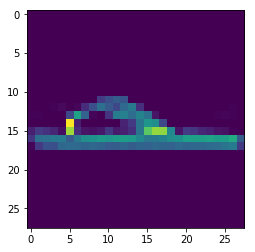

In [5]:
#Normalize data
x_train = train_data[:,1:]/255
y_train = train_data[:,0]
x_test= test_data[:,1:]/255
y_test=test_data[:,0]

#Split training data for crossvalidation
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

#Show sample image
image = x_train[61,:].reshape((28,28))
plt.imshow(image)
plt.show()

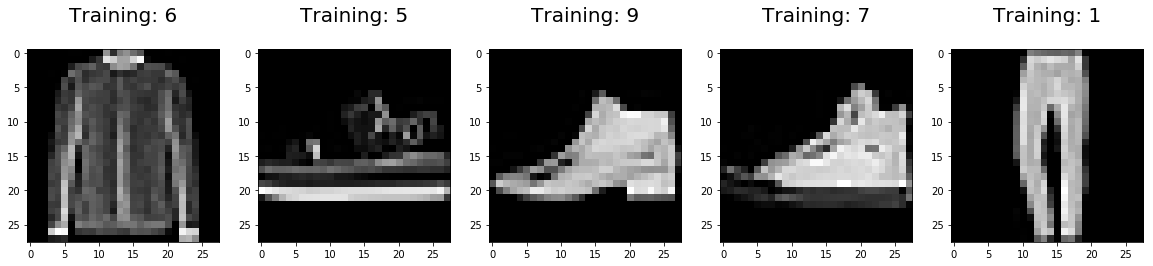

In [26]:
plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(x_train[0:5], y_train[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20)

In [ ]:
#####################################
######## Logistic Regression ########
#####################################

In [28]:
from sklearn.linear_model import LogisticRegression
logisticRegr = LogisticRegression()

In [30]:
start_time = time.time()
logisticRegr.fit(x_train, y_train)
training_time = time.time() - start_time

In [31]:
mm = training_time // 60
ss = training_time % 60
print('Trained model in {}:{}'.format(int(mm), round(ss, 1)))

Trained model in 2:3.6


In [32]:
predictions = logisticRegr.predict(x_test)

In [33]:
# Use score method to get accuracy of model
score = logisticRegr.score(x_test, y_test)
print(score)

0.8522


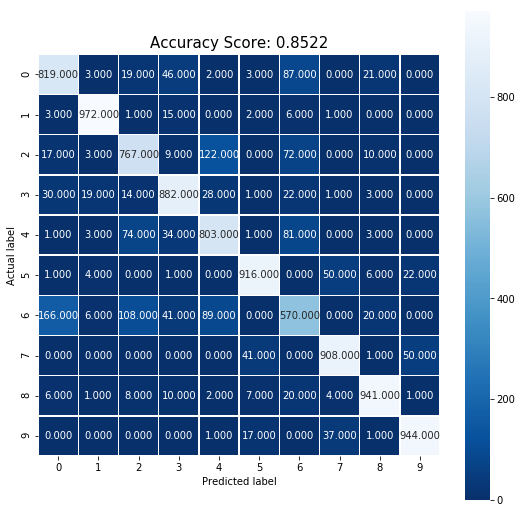

In [34]:
cm = metrics.confusion_matrix(y_test, predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);

In [ ]:
#####################################
########### Random Forest ###########
#####################################

In [21]:
#https://www.researchgate.net/publication/230766603_How_Many_Trees_in_a_Random_Forest

import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

X_train = train_df.drop('label', axis=1)
y_train = train_df['label']
X_test = test_df.drop('label', axis=1)
y_test = test_df['label']

start_time = time.time()

model = RandomForestClassifier(n_estimators=64, n_jobs=-1) 
model.fit(X_train, y_train.values.ravel())
training_time = time.time() - start_time

# Predict
y_pred = model.predict(X_test)

# Print result
score1 = accuracy_score(y_test, y_pred)

In [22]:
mm = training_time // 60
ss = training_time % 60
print('Trained model in {}:{}'.format(int(mm), round(ss, 1)))

Trained model in 0:24.9


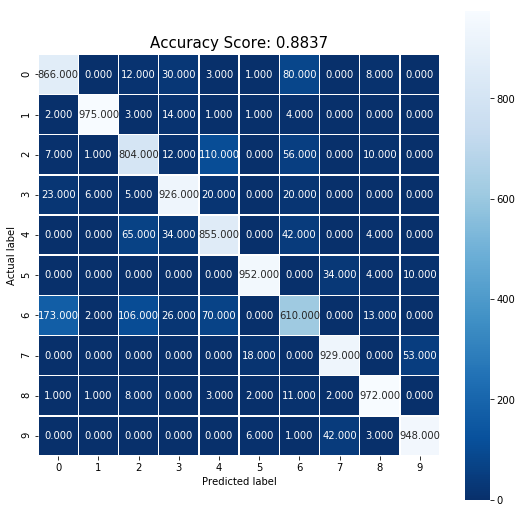

In [23]:
cm = metrics.confusion_matrix(y_test, y_pred)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score1)
plt.title(all_sample_title, size = 15);

In [ ]:
#####################################
### Convolutional Neural Network ####
#####################################

In [6]:
#Create parameters
image_rows = 28
image_cols = 28
batch_size = 200
image_shape = (image_rows,image_cols,1) # Defined the shape of the image as 3d with rows and columns and 1 for the 3d v

In [7]:
#Reshape datasets for CNN model
x_train = x_train.reshape(x_train.shape[0],*image_shape)

x_test = x_test.reshape(x_test.shape[0],*image_shape)

x_validate = x_validate.reshape(x_validate.shape[0],*image_shape)

In [8]:
#Create model with parameters
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape = image_shape),
    MaxPooling2D(pool_size=2) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2), #Randomly exclude 20% of neurons
    Flatten(), #Convert to vector
    Dense(128,activation='relu'),  
    Dense(10,activation = 'softmax')
    
])

In [9]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer='adam',metrics =['accuracy'])

In [10]:
import time
start_time = time.time()


history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=batch_size,
    epochs=10,
    verbose=1,
    validation_data=(x_validate,y_validate),
)

training_time = time.time() - start_time

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 272s 6ms/step - loss: 0.5148 - acc: 0.8221 - val_loss: 0.3570 - val_acc: 0.8790
Epoch 2/10
48000/48000 [==============================] - 257s 5ms/step - loss: 0.3469 - acc: 0.8783 - val_loss: 0.3185 - val_acc: 0.8864
Epoch 3/10
48000/48000 [==============================] - 255s 5ms/step - loss: 0.3065 - acc: 0.8911 - val_loss: 0.3191 - val_acc: 0.8846
Epoch 4/10
48000/48000 [==============================] - 256s 5ms/step - loss: 0.2807 - acc: 0.8996 - val_loss: 0.3058 - val_acc: 0.8905
Epoch 5/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.2583 - acc: 0.9067 - val_loss: 0.2614 - val_acc: 0.9055
Epoch 6/10
48000/48000 [==============================] - 251s 5ms/step - loss: 0.2389 - acc: 0.9143 - val_loss: 0.2606 - val_acc: 0.9048
Epoch 7/10
48000/48000 [==============================] - 248s 5ms/step - loss: 0.2274 - acc: 0.9175 - val_loss: 0.2479 - 

In [12]:
epochs = 10
mm = training_time // 60
ss = training_time % 60
print('Training {} epochs in {}:{}'.format(epochs, int(mm), round(ss, 1)))

Training 10 epochs in 44:48.2


In [13]:
score = cnn_model.evaluate(x_test,y_test,verbose=0)

print('Test Loss : {:.4f}'.format(score[0]))

print('Test Accuracy : {:.4f}'.format(score[1]))

Test Loss : 0.2363
Test Accuracy : 0.9159


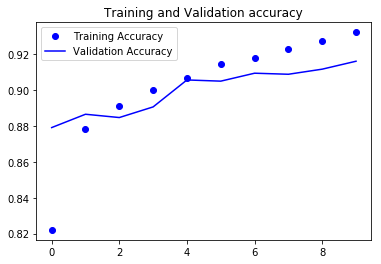

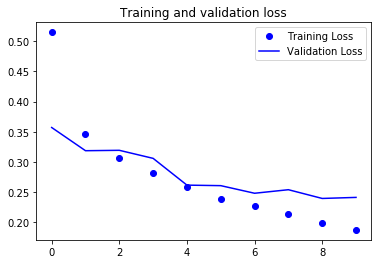

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
accuracy = history.history['acc']
val_accuracy = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation Accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [16]:
#get the predictions for the test data
predicted_classes = cnn_model.predict_classes(x_test)
#get the indices to be plotted
y_true = test_df.iloc[:, 0]
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

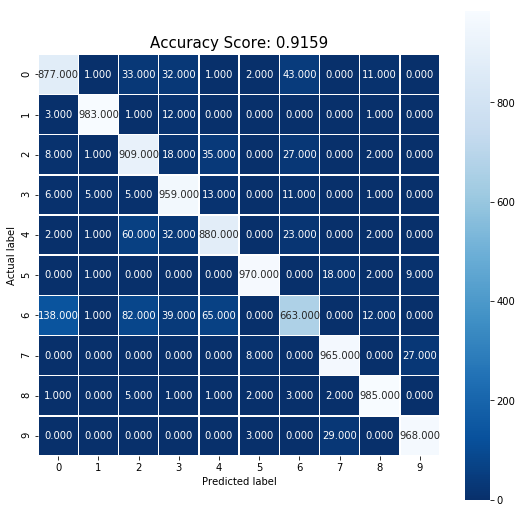

In [19]:
from sklearn import metrics
import seaborn as sns

cm = metrics.confusion_matrix(y_test, predicted_classes)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score[1])
plt.title(all_sample_title, size = 15);

In [22]:
# Create dictionary of target classes
label_dict = {
 0: 'T-shirt/top',
 1: 'Trouser',
 2: 'Pullover',
 3: 'Dress',
 4: 'Coat',
 5: 'Sandal',
 6: 'Shirt',
 7: 'Sneaker',
 8: 'Bag',
 9: 'Ankle boot'
}